INSTALLING PACKAGES

In [1]:
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
!pip3 install torchtext
!pip3 install torchvision
!pip3 install --no-cache-dir -I pillow


    100% |████████████████████████████████| 2.0MB 36.6MB/s 


DOWNLOAD DATA

In [0]:
import os
import torch
import torchvision
from torchvision.datasets.utils import download_url
import zipfile


train_path = 'train'
dl_file = 'dl2018-image-proj.zip'
dl_url = 'https://users.aalto.fi/mvsjober/misc/'

zip_path = os.path.join(train_path, dl_file)
if not os.path.isfile(zip_path):
    download_url(dl_url + dl_file, root=train_path, filename=dl_file, md5=None)

with zipfile.ZipFile(zip_path) as zip_f:
    zip_f.extractall(train_path)
    
    #os.unlink(zip_path)

In [3]:
!ls train/images/im1.jpg

train/images/im1.jpg


In [0]:
# workaround 
from PIL import Image
def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
Image.register_extension = register_extension
def register_extensions(id, extensions): 
  for extension in extensions: register_extension(id, extension)
Image.register_extensions = register_extensions

In [5]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL
print(PIL.PILLOW_VERSION)

5.4.0


In [0]:
PATH = "train/images/"

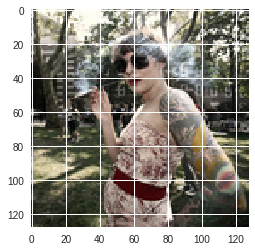

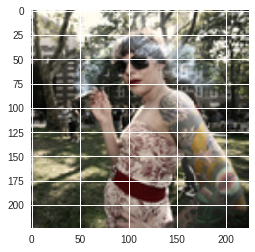

In [7]:
img=mpimg.imread(f'{PATH}/im1.jpg')
imgplot = plt.imshow(img)
plt.show()

im = cv2.imread(f'{PATH}/im1.jpg')
im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)
plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()

Image functions

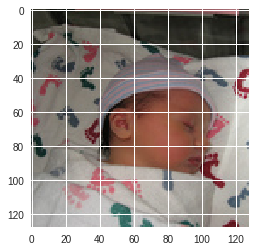

In [8]:
#by path
def plot_imgname(name):
  img=mpimg.imread(f'{PATH}{name}.jpg')
  imgplot = plt.imshow(img)
  plt.show()

plot_imgname('im185')

#check if grayscale
def is_grey_scale(path):
    
    im = Image.open(img_path).convert('RGB')
    w,h = im.size
    for i in range(w):
        for j in range(h):
            r,g,b = im.getpixel((i,j))
            if r != g != b: return False
    return True

def plot_image(tensor):
  if tensor.shape[0] == 3:
    x = tensor.permute(1,2,0).data.numpy()
    plt.imshow(x)
  elif tensor.shape[0] == 1:
    x = tensor.permute(1,2,0).squeeze(2).data.numpy()
    plt.imshow(x, cmap='gray')

In [0]:
# check all the classes

from os import listdir
from os.path import isfile, join
classes = [f[:-4] for f in listdir('train/annotations/') if isfile(join('train/annotations/', f))]

In [10]:
classes

['portrait',
 'car',
 'clouds',
 'night',
 'baby',
 'river',
 'female',
 'tree',
 'male',
 'dog',
 'flower',
 'bird',
 'people',
 'sea']

In [0]:
def file_len(fname):
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    return i + 1

In [0]:
# distribution of the classes
path='train/annotations/'

dist = dict([(f'{f[:-4]}',file_len(f'{path}{f}')) for f in listdir(path) if isfile(join(path, f))])
            
            

In [13]:
dist

{'baby': 95,
 'bird': 360,
 'car': 319,
 'clouds': 1095,
 'dog': 448,
 'female': 3227,
 'flower': 761,
 'male': 2979,
 'night': 598,
 'people': 6403,
 'portrait': 3121,
 'river': 120,
 'sea': 173,
 'tree': 525}

<Container object of 14 artists>

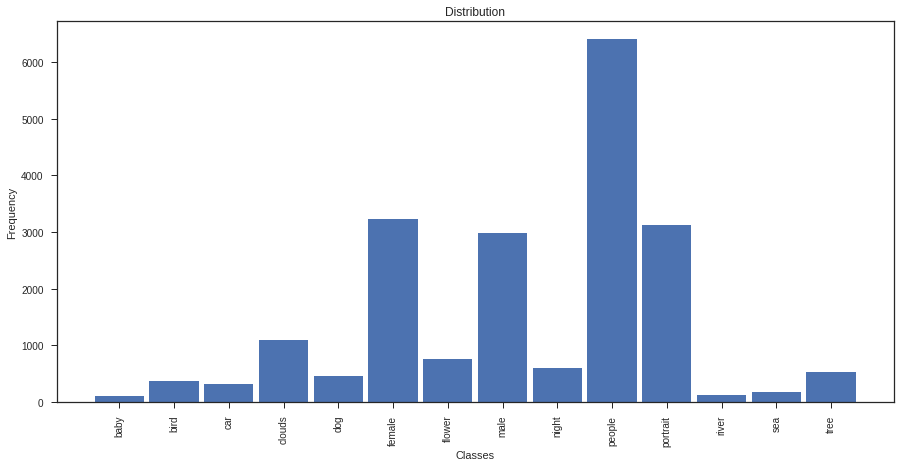

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.xlabel("Classes")
plt.title(f"Distribution")
plt.bar(dist.keys(), dist.values(), width=0.9, color='b')

In [15]:
# sort all the images from im1....imn
file_col = listdir("train/images")
list1 = [int(x[2:len(x)-4]) for x in file_col]
list1.sort()
listfin = ["train/images/im"+str(num)+".jpg" for num in list1]

file_col = pd.Series(listfin)

# creation of the dataframe 
df = pd.DataFrame()
df["fileName"] = file_col

path = "train/annotations"

row = 0

# file dic contains how many samples there are for each class. Is it needed?
file_dic = {}

for label, filename in enumerate(listdir(path)):
  # array of zeros (20000,) that will be one column of the df
  tmp = np.zeros(file_col.shape[0], dtype=int)
  with open(path+"/"+filename, "r") as file:
    file_len = 0
    for line in file:
      # get the line that contains that image
      line = line.replace("\n", "")
      line = int(line)
      tmp[line-1] = 1   # set 1 for the image that contains that class 
      file_len = file_len + 1
  filename = filename[:-4]
  tmp = pd.Series(tmp)
  df[filename] = tmp
  file_dic[filename] = file_len

print(file_dic)

{'portrait': 3121, 'car': 319, 'clouds': 1095, 'night': 598, 'baby': 95, 'river': 120, 'female': 3227, 'tree': 525, 'male': 2979, 'dog': 448, 'flower': 761, 'bird': 360, 'people': 6403, 'sea': 173}


In [16]:
df.shape

(20000, 15)

In [17]:
df.head()


,fileName,portrait,car,clouds,night,baby,river,female,tree,male,dog,flower,bird,people,sea
0,train/images/im1.jpg,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,train/images/im2.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,train/images/im3.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,train/images/im4.jpg,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,train/images/im5.jpg,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [18]:
# displaying inline pandas images
import glob
import random
import base64
from io import BytesIO
from IPython.display import HTML

pd.set_option('display.max_colwidth', -1)

# put the PIL image in the df

def get_thumbnail(path):
    i = Image.open(path)
    i.thumbnail((150, 150), Image.LANCZOS)
    return i
  
def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

df['image'] = df.fileName.map(lambda f: get_thumbnail(f))
df.head()

,fileName,portrait,car,clouds,night,baby,river,female,tree,male,dog,flower,bird,people,sea,image
0,train/images/im1.jpg,1,0,0,0,0,0,1,0,0,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7F2B28677F60>
1,train/images/im2.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7F2B2852D748>
2,train/images/im3.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7F2B2852D7B8>
3,train/images/im4.jpg,0,0,0,0,0,0,0,0,1,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7F2B2852D860>
4,train/images/im5.jpg,0,0,0,0,0,0,0,0,1,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7F2B2852D908>


In [19]:
df.shape

(20000, 16)

In [0]:
def vec2label (df):
  l = []
  for i in range(df.shape[0]):
    p = []
    for k in df.columns[1:-1]:
      if df.loc[i][f'{k}']:
        p.append(k)
    l.append(p)
  l = pd.Series(l)
  return l

df['classes']= vec2label(df)

In [21]:
df.shape

(20000, 17)

,fileName,image,classes
0,train/images/im1.jpg,,"[portrait, female, people]"
1,train/images/im2.jpg,,[]
2,train/images/im3.jpg,,[]
3,train/images/im4.jpg,,"[male, people]"
4,train/images/im5.jpg,,"[male, people]"
5,train/images/im6.jpg,,[]
6,train/images/im7.jpg,,"[female, people]"
7,train/images/im8.jpg,,[]
8,train/images/im9.jpg,,[]
9,train/images/im10.jpg,,[]

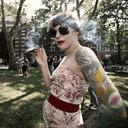
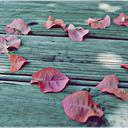
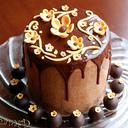
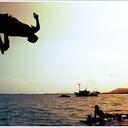
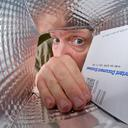
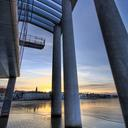
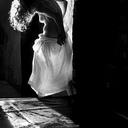
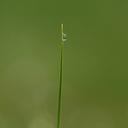
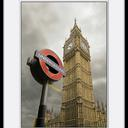
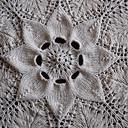
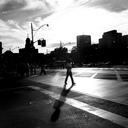
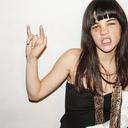
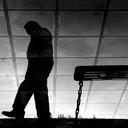
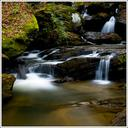
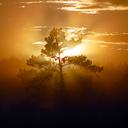
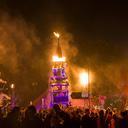
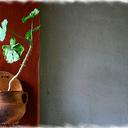
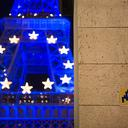
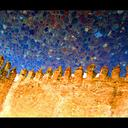
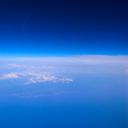

In [22]:
HTML(df[['fileName', 'image','classes']].head(20).to_html(formatters={'image': image_formatter}, escape=False))

In [23]:

mask = df['classes'].astype(str) == '[]' 
missing_values = sum(mask)
print("missing values:", missing_values)

missing values: 9824


In [24]:
# percentage of images without class
print((missing_values/20000)*100)

49.120000000000005


In [25]:
# delete all the values without target
df = df[~mask]
df.head()

,fileName,portrait,car,clouds,night,baby,river,female,tree,male,dog,flower,bird,people,sea,image,classes
0,train/images/im1.jpg,1,0,0,0,0,0,1,0,0,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7F2B28677F60>,"[portrait, female, people]"
3,train/images/im4.jpg,0,0,0,0,0,0,0,0,1,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7F2B2852D860>,"[male, people]"
4,train/images/im5.jpg,0,0,0,0,0,0,0,0,1,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7F2B2852D908>,"[male, people]"
6,train/images/im7.jpg,0,0,0,0,0,0,1,0,0,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128 at 0x7F2B2852DA58>,"[female, people]"
10,train/images/im11.jpg,0,0,0,0,0,0,0,0,1,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128 at 0x7F2B2852DCF8>,"[male, people]"


In [0]:
df.to_csv("data.csv")

In [27]:
df.head()

,fileName,portrait,car,clouds,night,baby,river,female,tree,male,dog,flower,bird,people,sea,image,classes
0,train/images/im1.jpg,1,0,0,0,0,0,1,0,0,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7F2B28677F60>,"[portrait, female, people]"
3,train/images/im4.jpg,0,0,0,0,0,0,0,0,1,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7F2B2852D860>,"[male, people]"
4,train/images/im5.jpg,0,0,0,0,0,0,0,0,1,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7F2B2852D908>,"[male, people]"
6,train/images/im7.jpg,0,0,0,0,0,0,1,0,0,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128 at 0x7F2B2852DA58>,"[female, people]"
10,train/images/im11.jpg,0,0,0,0,0,0,0,0,1,0,0,0,1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128 at 0x7F2B2852DCF8>,"[male, people]"


In [28]:
print(df.iloc[0,0])

train/images/im1.jpg


In [0]:
# PREPARING THE DATALOADER
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings ?
import warnings
warnings.filterwarnings("ignore")
import operator

class ImageDataset:
  def __init__ (self, csv_file, transformations=None):
    self.data_frame = pd.read_csv(csv_file)
    self.data_frame=self.data_frame.drop(['Unnamed: 0'], axis=1)
    self.to_tensor = transforms.ToTensor()
    # for data augmentation
    self.transformations = transformations
      
  
  def __len__(self):
        return len(self.data_frame)
   
  def __getitem__(self, idx):
    
    # Get image name from the pandas df
    single_image_name = self.data_frame.iloc[idx,0]
    
    # Open image
    img_as_img = Image.open(single_image_name).convert("RGB")
    
    if self.transformations:
      img_as_img = self.transformations(img_as_img)

    # Transform image to tensor
    img_as_tensor = self.to_tensor(img_as_img)
    
    labels = np.asarray(self.data_frame.iloc[idx,1:-2], dtype=np.int16)
    labels_classes = self.data_frame.iloc[idx,16]
    sample = dict({'image': img_as_tensor, 'labels': labels, 'classes':labels_classes})
    return (sample)
  
  
        
    


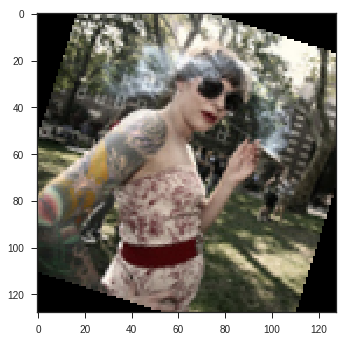

In [30]:
tfs = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20, resample=PIL.Image.BILINEAR),
])

image_dataset = ImageDataset("data.csv", tfs)
plot_image(image_dataset.__getitem__(0)['image'])


0 torch.Size([3, 128, 128]) ['portrait', 'female', 'people']
1 torch.Size([3, 128, 128]) ['male', 'people']
2 torch.Size([3, 128, 128]) ['male', 'people']
3 torch.Size([3, 128, 128]) ['female', 'people']
4 torch.Size([3, 128, 128]) ['male', 'people']


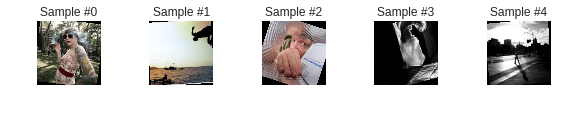

In [31]:
fig = plt.figure()

for i in range(len(image_dataset)):
    sample = image_dataset[i]
    print(i, sample['image'].shape, sample['classes'])
    
    ax = plt.subplot(1, 5, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    plot_image(sample['image'])
   
    if i == 4:
        plt.show()
        break

In [32]:
image_dataset.__getitem__(1)

{'classes': "['male', 'people']",
 'image': tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000

split training and test set 90-10 split

In [33]:
# percentage per class in the dataset now
class_df = df.iloc[ : , range(1,15)]
classes_entire_df = class_df.sum(axis=0)/class_df.shape[0]
print("Percentage of images per classes")
print(classes_entire_df*100)
print("\n")
print("Number of image per class")
print(class_df.sum(axis=0))

Percentage of images per classes
portrait    30.670204
car         3.134827 
clouds      10.760613
night       5.876572 
baby        0.933569 
river       1.179245 
female      31.711871
tree        5.159198 
male        29.274764
dog         4.402516 
flower      7.478381 
bird        3.537736 
people      62.922563
sea         1.700079 
dtype: float64


Number of image per class
portrait    3121
car         319 
clouds      1095
night       598 
baby        95  
river       120 
female      3227
tree        525 
male        2979
dog         448 
flower      761 
bird        360 
people      6403
sea         173 
dtype: int64


#### Splitting strategy: 

Each class has to appear in the training and validation set. The training set will contain 90% of the data and the remaining 10% will be in the validation set.
Our idea is to mantian more or less the same proportion of data in the training  and validation set. Unfortunately, this operation is not feasable in this senario due to the fact that the classes are hight correlated. In fact, we saw that when one of the classes "male" or "female" or "baby" appears usually appears also the class "people".



In [34]:
class_df.loc[class_df["baby"]==1,:].sum(axis=0)

portrait    80
car         0 
clouds      0 
night       0 
baby        95
river       0 
female      23
tree        0 
male        43
dog         0 
flower      0 
bird        0 
people      94
sea         0 
dtype: int64

In [35]:
class_df.loc[class_df["river"]==1,:].sum(axis=0)

portrait    3  
car         0  
clouds      28 
night       3  
baby        0  
river       120
female      4  
tree        13 
male        8  
dog         0  
flower      0  
bird        0  
people      14 
sea         1  
dtype: int64

In [36]:
class_df.loc[class_df["male"]==1,:].sum(axis=0)

portrait    1327
car         20  
clouds      60  
night       32  
baby        43  
river       8   
female      581 
tree        15  
male        2979
dog         27  
flower      9   
bird        8   
people      2928
sea         30  
dtype: int64

In [37]:
class_df.loc[class_df["female"]==1,:].sum(axis=0)

portrait    1946
car         13  
clouds      31  
night       11  
baby        23  
river       4   
female      3227
tree        12  
male        581 
dog         23  
flower      26  
bird        8   
people      3166
sea         15  
dtype: int64

Our idea is to balance the dataset. That means having the same proportion of the classes in both the training and validation set repect to the initial distribution of the data. For example we want to have the same proportion of the images that have the label "baby". The problem is that there are some classes which are **less representative**, which means that we don't have several example of one image. So could be difficult to have a balanced training and test splitting randomly the whole dataset.
So, the classes that are most liked to not be present in a corret way in the training and in the validation set are the classes that are less rappresentative. (i.e. "Baby", "river", "sea",  "bird", "car").
To balance the dataset let's put constraint for this class in the splitting procedure in order to ensure the right rappresentation of each class in both training and test set.

In [38]:

from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.1)

# baby images are 95 --> 10% of 95 = 9.5
# river images are 120 --> 10% of 95 = 12
# river images are 173 --> 10% of 95 = 17
# baby images are 360 --> 10% of 95 = 36
# baby images are 319 --> 10% of 95 = 32

while ((test_data["baby"].sum(axis=0))<9 or (test_data["baby"].sum(axis=0))>10 or
       (test_data["river"].sum(axis=0))<10 or (test_data["river"].sum(axis=0))>14 or
       (test_data["sea"].sum(axis=0))<15 or (test_data["sea"].sum(axis=0))>19 or
       (test_data["bird"].sum(axis=0))<31 or (test_data["bird"].sum(axis=0))>41 or
       (test_data["car"].sum(axis=0))<27 or (test_data["car"].sum(axis=0))>37):
  
  train_data, test_data = train_test_split(df, test_size=0.1)
  
  
print("data in training set")
print(train_data.iloc[ : , range(1,15)].sum(axis=0))
print("data in validation set")
print(test_data.iloc[ : , range(1,15)].sum(axis=0))

data in training set
portrait    2804
car         287 
clouds      998 
night       540 
baby        85  
river       109 
female      2926
tree        483 
male        2647
dog         398 
flower      687 
bird        326 
people      5748
sea         154 
dtype: int64
data in validation set
portrait    317
car         32 
clouds      97 
night       58 
baby        10 
river       11 
female      301
tree        42 
male        332
dog         50 
flower      74 
bird        34 
people      655
sea         19 
dtype: int64


([<matplotlib.axis.XTick at 0x7f2b2489ce10>,
 <a list of 14 Text xticklabel objects>)

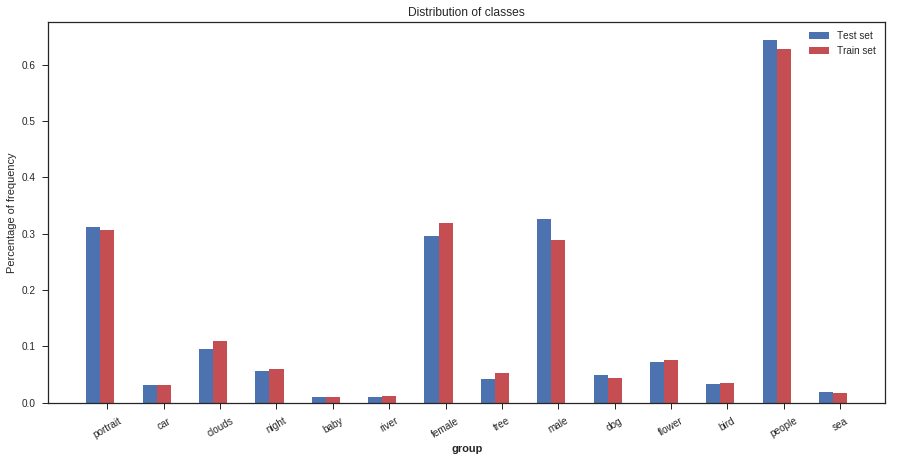

In [39]:
#plot the proportion in the two dataset
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
plt.figure(figsize=(15,7))
plt.ylabel("Percentage of frequency")
plt.xlabel("Classes")
plt.title(f"Distribution of classes")
r1 = np.arange(len(test_data.iloc[ : , range(1,15)].sum(axis=0)))
r2 = [x + 0.25 for x in r1]

plt.bar(r1, test_data.iloc[ : , range(1,15)].sum(axis=0)/test_data.shape[0], width=0.25, color='b', label="Test set")
plt.bar(r2, train_data.iloc[ : , range(1,15)].sum(axis=0)/train_data.shape[0], width=0.25, color='r', label="Train set")
plt.legend()

# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + 0.25 for r in range(len(test_data.iloc[ : , range(1,15)].sum(axis=0)))], classes, rotation=30)


In [0]:
# let's take the percentage of representativeness of classes in the train set that will we use as threshold in the prevision step:


threshold_prevision = train_data.iloc[ : , range(1,15)].sum(axis=0)/train_data.shape[0]

In [41]:
# proportion of the images in the training set
torch.tensor(threshold_prevision)

tensor([0.3062, 0.0313, 0.1090, 0.0590, 0.0093, 0.0119, 0.3195, 0.0527, 0.2890,
        0.0435, 0.0750, 0.0356, 0.6276, 0.0168])

In [0]:

'''
train_data.index = range(len(train_data.index))
test_data.index = range(len(test_data.index))
'''
test_data.to_csv('./test.csv')
train_data.to_csv('./train.csv')


In [43]:
train_dataset = ImageDataset("train.csv", tfs)
test_dataset = ImageDataset("test.csv")

dataloader = DataLoader(image_dataset, batch_size=32, shuffle=True, num_workers=4)
for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['classes'])

    # observe 4th batch and stop.
    if i_batch == 3:
      break

0 torch.Size([32, 3, 128, 128]) ["['tree', 'flower']", "['portrait', 'male', 'people']", "['female', 'people']", "['tree']", "['female', 'people']", "['night']", "['flower']", "['clouds']", "['portrait', 'baby', 'male', 'people']", "['female', 'people']", "['sea']", "['portrait', 'female', 'people']", "['male', 'people', 'sea']", "['bird']", "['male', 'people']", "['portrait', 'male', 'people']", "['portrait', 'male', 'people']", "['clouds']", "['portrait', 'male', 'people']", "['portrait', 'female', 'people']", "['tree']", "['male', 'people']", "['clouds']", "['clouds', 'bird']", "['female', 'people']", "['portrait', 'female', 'people']", "['clouds']", "['portrait', 'female', 'people']", "['clouds']", "['portrait', 'female', 'people']", "['flower']", "['portrait', 'female', 'people']"]
1 torch.Size([32, 3, 128, 128]) ["['portrait', 'male', 'people']", "['portrait', 'female', 'male', 'people']", "['car']", "['night']", "['portrait', 'male', 'people']", "['dog']", "['portrait', 'female'

In [44]:
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True,num_workers=4)
validation_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False,num_workers=4)

for i_batch, sample_batched in enumerate(train_loader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['classes'])

    # observe 4th batch and stop.
    if i_batch == 3:
      break

0 torch.Size([64, 3, 128, 128]) ["['portrait', 'female', 'people']", "['portrait', 'female', 'people']", "['people']", "['flower']", "['bird']", "['portrait', 'female', 'male', 'people']", "['portrait', 'male', 'people']", "['flower']", "['female', 'male', 'people']", "['car', 'clouds']", "['dog']", "['female', 'male', 'people']", "['portrait', 'female', 'people']", "['portrait', 'female', 'male', 'people']", "['tree']", "['people', 'sea']", "['dog']", "['clouds']", "['portrait', 'female', 'people']", "['portrait', 'female', 'people']", "['female', 'male', 'people']", "['bird']", "['flower']", "['people']", "['clouds']", "['portrait', 'female', 'male', 'people']", "['flower']", "['clouds']", "['clouds', 'tree']", "['portrait', 'male', 'people']", "['night', 'tree']", "['bird']", "['portrait', 'baby', 'male', 'people']", "['night']", "['bird']", "['car', 'female', 'people']", "['female', 'people']", "['female', 'male', 'people']", "['female', 'people']", "['dog']", "['portrait', 'female

['flower']


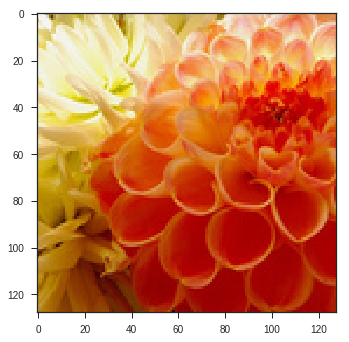

In [45]:
plot_image(test_dataset.__getitem__(6)['image'])
print(test_dataset.__getitem__(6)['classes'])

In [46]:
!mkdir train, test

mkdir: cannot create directory ‘train,’: File exists
mkdir: cannot create directory ‘test’: File exists


In [0]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
         # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, stride=1, padding=0)
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=0)
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)  
        self.dropout = nn.Dropout(p=0.5)
        # Fully connected 1 (readout)
        self.fc1 = nn.Linear(32*30*30, 14)
     
    def forward(self, x):
        # Convolution 1
        out = F.relu(self.cnn1(x))
        
        # Max pool 1
        out = self.maxpool1(out)
        
        # Convolution 2 
        out = F.relu(self.cnn2(out))
        
        # Max pool 2 
        out = self.maxpool2(out)
        
        out = out.view(out.size(0), -1)
        out = self.dropout(out)
        # Linear function (readout)
        out = torch.sigmoid(self.fc1(out))
        
        return out
    


In [48]:
if torch.cuda.is_available():
    print('Using GPU!')
    device = torch.device('cuda')
else:
    print('Using CPU')
    device = torch.device('cpu')

Using GPU!


In [0]:
def train(train_loss, epoch, log_interval=100):
    model.train()
    loss_temp=0
    
    for batch_idx, databatch in enumerate(train_loader):
        data = databatch['image'].to(device).float()
        target = databatch['labels'].to(device).float()
        optimizer.zero_grad() 
        output = model(data)
        loss = criterion(output, target)
        loss_temp += loss
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data.item()))
        
    train_loss.append(loss_temp/len(train_loader))

In [0]:
# PRECISION AND RECALL (OLD METHOD)

def precision(true_pos, false_pos):
  if true_pos+false_pos == 0:  # avoids to return nan
    return 0
  return (true_pos / (true_pos+false_pos))

def recall(true_pos, false_neg):  
  if true_pos+false_neg == 0:  # avoids to return nan
    return 0
  return (true_pos / (true_pos+false_neg))

In [0]:
import seaborn as sn
from sklearn.metrics import f1_score
# this function calculates precision and recall FOR EACH CLASS (Deprecated)

def validate_model(loss_vector, n_class, f1=False):
    model.eval()
    val_loss = 0
    
    true_pos = np.array([0 for c in classes])
    false_pos = np.array([0 for c in classes])
    false_neg = np.array([0 for c in classes])
    
    precision_sum = np.zeros(14)
    recall_sum = np.zeros(14)
   
    
    for databatch in (validation_loader):
        data = databatch['image'].to(device).float()
        target = databatch['labels'].to(device).float()
        output = model(data)
        
        val_loss += criterion(output, target).data.item()
        
        #print(torch.exp(output)[0,])
        
        pred = torch.tensor((torch.exp(output) > torch.tensor(threshold_prevision).to(device)),dtype=torch.float)
        
        #print(pred[0,])
        #print("\n")
        #print("\n")
        #print("\n")
        y_true = target.cpu().detach().numpy() # [0, 0, 1, 0 ...]
        y_pred = pred.cpu().detach().numpy() # [1, 0, 1, 0 ...]
        
        # for each output check if the elements predicted are true_pos,
        # false_pos or false_neg
        
        for idx in range(y_true.shape[0]):
          true_elem = y_true[idx]
          pred_elem = y_pred[idx]
          
          # print("true", true_elem)
          # print("pred", pred_elem)
          for idx2 in range(len(true_elem)):
            if true_elem[idx2] == pred_elem[idx2] and true_elem[idx2] == 1:
              true_pos[idx2] += 1
            elif true_elem[idx2] != pred_elem[idx2]:
              if pred_elem[idx2] == 1:
                false_pos[idx2] += 1
              else:
                false_neg[idx2] += 1
        
        # print("true pos", true_pos)
        # print("false pos", false_pos)
        # print("false neg", false_neg)
          
          
    precision_sum = [precision(true_pos[c], false_pos[c]) for c in range(n_class)]
    recall_sum = [recall(true_pos[c], false_neg[c]) for c in range(n_class)]
    
    # print("precision:", precision_sum)
    # print("recall:", recall_sum)
      
    val_loss /= len(validation_loader)
    loss_vector.append(val_loss)
    
    print('\nValidation set: Average loss: {:.4f}\n precision: \n{}\n recall: \n{}\n'.format(
        val_loss, precision_sum, recall_sum))
    if f1:  
      precision_average = precision_sum*threshold_prevision
      recall_average = np.mean(recall_sum)
      
      F1 = 2 * (precision_average * recall_average) / (precision_average + recall_average)
      print('f1_score: {}'.format(F1))
      
        

In [0]:
import seaborn as sn
from sklearn.metrics import f1_score
# this function calculates precision and recall FOR EACH CLASS

def validate_old(loss_vector): # DEPRECATED
  model.eval()
  val_loss = 0
  
  f1_scores = []
  precisions = []
  recalls = []
  
  for databatch in (validation_loader):
    data = databatch['image'].to(device).float()
    target = databatch['labels'].to(device).float()
    output = model(data)

    val_loss += criterion(output, target).data.item()

    pred = torch.tensor((torch.exp(output) > torch.tensor(threshold_prevision).to(device)),dtype=torch.float)
    
    y_true = target.cpu().detach().numpy() # [0, 0, 1, 0 ...]
    y_pred = pred.cpu().detach().numpy() # [1, 0, 1, 0 ...]
    
    f1 = f1_score(y_true, y_pred, average='micro')
    
    recall = recall_score(y_true=y_true, y_pred=y_pred, average='micro')
    precision = precision_score(y_true=y_true, y_pred=y_pred, average='micro')
    
    f1_scores.append(f1)
    precisions.append(precision)
    recalls.append(recall)
    
  print("precision: {}".format(np.mean(precisions)))
  print("recall: {}".format(np.mean(recalls)))
  print("f1_score: {}".format(np.mean(f1_scores)))

In [0]:
import seaborn as sn
from sklearn.metrics import f1_score, recall_score, precision_score
# this function calculates precision and recall FOR EACH CLASS

def validate(loss_vector):  # CORRECT VALIDATION
  model.eval()
  val_loss = 0
  
  matrix_true = np.array([])
  matrix_pred = np.array([])
  
  n_batch = 0
  
  for databatch in (validation_loader):
    n_batch = n_batch+1
    data = databatch['image'].to(device).float()
    target = databatch['labels'].to(device).float()
    output = model(data)

    val_loss += criterion(output, target).data.item()

    pred = torch.tensor(output > torch.tensor(threshold_prevision).to(device),dtype=torch.float)
    
    y_true = target.cpu().detach().numpy() # [0, 0, 1, 0 ...]
    y_pred = pred.cpu().detach().numpy() # [1, 0, 1, 0 ...]
    
    if matrix_true.shape[0] == 0:
      matrix_true = y_true
      matrix_pred = y_pred
    else:
      matrix_true = np.vstack([matrix_true, y_true])
      matrix_pred = np.vstack([matrix_pred, y_pred])
    
    # print(matrix_true.shape)
    # print(matrix_pred.shape)
  
    
  val_loss = val_loss/n_batch
  f1 = f1_score(matrix_true, matrix_pred, average='micro')
    
  recall = recall_score(y_true=matrix_true, y_pred=matrix_pred, average='micro')
  precision = precision_score(y_true=matrix_true, y_pred=matrix_pred, average='micro')
  
  print('\nValidation set: Average loss: {:.4f}'.format(val_loss))
  print("precision: {}".format(precision))
  print("recall: {}".format(recall))
  print("f1_score: {}".format(f1))
  
  loss_vector.append(val_loss)

In [54]:
# how many images there are
test_data.shape[0]

1018

In [55]:
model = Net()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
criterion = nn.BCELoss()

print(model)

use_cuda = True
if use_cuda and torch.cuda.is_available():
    model.cuda()

Net(
  (cnn1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5)
  (fc1): Linear(in_features=28800, out_features=14, bias=True)
)


In [0]:
%%time
epochs = 8

train_loss,valid_loss, accv = [], [], []
for epoch in range(1, epochs + 1):
  train(train_loss, epoch)
  validate(valid_loss)

Train Epoch: 1 [0/9158 (0%)]	Loss: 0.690011
Train Epoch: 1 [1600/9158 (17%)]	Loss: 0.392280
Train Epoch: 1 [3200/9158 (35%)]	Loss: 0.292102
Train Epoch: 1 [4800/9158 (52%)]	Loss: 0.279199
Train Epoch: 1 [6400/9158 (70%)]	Loss: 0.319324
Train Epoch: 1 [8000/9158 (87%)]	Loss: 0.327723

Validation set: Average loss: 20.3931
precision: 0.14495648451990298
recall: 0.5034687809712587
f1_score: 0.22510247036667777
Train Epoch: 2 [0/9158 (0%)]	Loss: 0.310903
Train Epoch: 2 [1600/9158 (17%)]	Loss: 0.351886
Train Epoch: 2 [3200/9158 (35%)]	Loss: 0.338415
Train Epoch: 2 [4800/9158 (52%)]	Loss: 0.300167
Train Epoch: 2 [6400/9158 (70%)]	Loss: 0.350730
Train Epoch: 2 [8000/9158 (87%)]	Loss: 0.302870

Validation set: Average loss: 20.2426
precision: 0.17778397990510744
recall: 0.6313181367690783
f1_score: 0.2774390243902439
Train Epoch: 3 [0/9158 (0%)]	Loss: 0.312683
Train Epoch: 3 [1600/9158 (17%)]	Loss: 0.287877
Train Epoch: 3 [3200/9158 (35%)]	Loss: 0.276802
Train Epoch: 3 [4800/9158 (52%)]	Loss: 

In [0]:
print(threshold_prevision)

night       0.058528
people      0.629177
clouds      0.107010
dog         0.043896
flower      0.075890
female      0.315244
baby        0.009282
male        0.293295
tree        0.052195
sea         0.016925
portrait    0.306071
bird        0.035597
car         0.030902
river       0.011684
dtype: float64


In [0]:
image = 1

data = test_dataset.__getitem__(image)['image'].to(device)

data = data.unsqueeze(0)

output = model(data)
pred = torch.tensor(output> torch.tensor(threshold_prevision).to(device),dtype=torch.float)
y_pred = pred.cpu().detach().numpy() # [1, 0, 1, 0 ...]

print(y_pred)
print(test_dataset.__getitem__(image)['labels'])

[[0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.]]
[0 0 0 0 0 0 0 0 0 0 1 0 0 0]


In [0]:
# let's try inception net

class Inception(nn.Module):
    def __init__(self, in_planes, n1x1, n3x3red, n3x3, n5x5red, n5x5, pool_planes):
        super(Inception, self).__init__()
        # 1x1 conv branch
        self.b1 = nn.Sequential(
            nn.Conv2d(in_planes, n1x1, kernel_size=1),
            nn.BatchNorm2d(n1x1),
            nn.ReLU(True),
        )

        # 1x1 conv -> 3x3 conv branch
        self.b2 = nn.Sequential(
            nn.Conv2d(in_planes, n3x3red, kernel_size=1),
            nn.BatchNorm2d(n3x3red),
            nn.ReLU(True),
            nn.Conv2d(n3x3red, n3x3, kernel_size=3, padding=1),
            nn.BatchNorm2d(n3x3),
            nn.ReLU(True),
        )

        # 1x1 conv -> 5x5 conv branch
        self.b3 = nn.Sequential(
            nn.Conv2d(in_planes, n5x5red, kernel_size=1),
            nn.BatchNorm2d(n5x5red),
            nn.ReLU(True),
            nn.Conv2d(n5x5red, n5x5, kernel_size=3, padding=1),
            nn.BatchNorm2d(n5x5),
            nn.ReLU(True),
            nn.Conv2d(n5x5, n5x5, kernel_size=3, padding=1),
            nn.BatchNorm2d(n5x5),
            nn.ReLU(True),
        )

        # 3x3 pool -> 1x1 conv branch
        self.b4 = nn.Sequential(
            nn.MaxPool2d(3, stride=1, padding=1),
            nn.Conv2d(in_planes, pool_planes, kernel_size=1),
            nn.BatchNorm2d(pool_planes),
            nn.ReLU(True),
        )

    def forward(self, x):
        y1 = self.b1(x)
        y2 = self.b2(x)
        y3 = self.b3(x)
        y4 = self.b4(x)
        return torch.cat([y1,y2,y3,y4], 1)

      
      
class Inception_Net(nn.Module):

    def __init__(self):
        super(Inception_Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv2d(64, 192, kernel_size=3, stride=1, padding=1)
        
        self.incept1 = Inception(192,
                                  64,
                                  96,128,
                                  16,32,
                                  32)
        
        self.incept2 = Inception(256,
                                  128,
                                  128,192,
                                  32,96,
                                  64
                                 )
        
        self.incept3 = Inception(480,
                                  192,
                                  96,208,
                                  16,48,
                                  64
                                 )
        
        self.incept4 = Inception(512,
                                  160,
                                  112,224,
                                  24,64,
                                  64
                                 )
        
        self.incept5 = Inception(512,
                                  128,
                                  128,256,
                                  24,64,
                                  64
                                  )
        

        self.incept6 = Inception(512,
                                  112,
                                  144,288,
                                  32,64,
                                  64
                                  )
        
        self.incept7 = Inception(528,
                                  256,
                                  160,320,
                                  32,128,
                                  128
                                  )
        
        self.incept8 = Inception(832,
                                  256,
                                  160,320,
                                  32,128,
                                  128
                                  )
        
        self.incept9 = Inception(832,
                                  384,
                                  192,384,
                                  48,128,
                                  128
                                  )
        

        self.pool_1 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.pool_2 = nn.MaxPool2d(kernel_size=3, stride=2, padding=0)
        
        self.fc = nn.Linear(1024, 14)
        
        self.dropout = .nn.Dropout(0.4)

    def forward(self, x):
      
        #in_size = x.size(0)
        
        # in 128x128x3 --> out 128x126x64
        x = F.relu(self.conv1(x))
        # in 128x128x64 --> out 63x63x64
        x = self.pool_1(x)
        
        # in 63x63x64 --> out 63x63x192
        x = F.relu(self.conv2(x))
        # in 63x63x192 --> out 30x30x192
        x = self.pool_2(x)
        
        #in 30x30x192 --> out 30x30x256
        x = self.incept1(x)
        
        #in 30x30x256 --> out 30x30x480
        x = self.incept2(x)
        
        #in 30x30x480 --> out 15x15x480
        x = self.pool_1(x)
        
        #in 15x15x480 --> out 15x15x512
        x = self.incept3(x)
        
        #in 15x15x512 --> out 15x15x512
        x = self.incept4(x)
        
        #in 15x15x512 --> out 15x15x512
        x = self.incept5(x)
        
        #in 15x15x512 --> out 15x15x528
        x = self.incept6(x)
        
        #in 15x15x528 --> out 15x15x832
        x = self.incept7(x)
        

        # in 15x15x528 --> out 7x7x832
        x = self.pool_2(x)
        
        
        #in 7x7x832 --> out 7x7x832
        x = self.incept8(x)
        
        #in 7x7x832 --> out 7x7x1024 
        x = self.incept9(x)
        
        #in 7x7x1024 --> out 1x1x1024 
        x = F.avg_pool2d(x, 7)

        x = x.view(-1, 1024)  # flatten the tensor
        
        x = self.dropout(x)
        
        #in 1x29952 --> out 1x14
        x = torch.sigmoid(self.fc(x))
        
        return x

In [58]:
model = Inception_Net()
optimizer = torch.optim.Adam(model.parameters())
criterion = nn.BCELoss()

print(model)

use_cuda = True
if use_cuda and torch.cuda.is_available():
    model.cuda()

Inception_Net(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (incept1): Inception(
    (b1): Sequential(
      (0): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)
    )
    (b2): Sequential(
      (0): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1))
      (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)
      (3): Conv2d(96, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace)
    )
    (b3): Sequential(
      (0): Conv2d(192, 16, kernel_size=(1, 1), stride=(1, 1))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)


In [89]:
%%time
epochs = 10

train_loss,valid_loss, accv = [], [], []
for epoch in range(1, epochs + 1):
  train(train_loss, epoch)
  validate(valid_loss)

Train Epoch: 1 [0/9158 (0%)]	Loss: 0.107325
Train Epoch: 1 [6400/9158 (69%)]	Loss: 0.162797

Validation set: Average loss: 0.1732
precision: 0.572318339100346
recall: 0.8139763779527559
f1_score: 0.6720845184884193
Train Epoch: 2 [0/9158 (0%)]	Loss: 0.109498
Train Epoch: 2 [6400/9158 (69%)]	Loss: 0.122780

Validation set: Average loss: 0.1887
precision: 0.5393059490084986
recall: 0.749507874015748
f1_score: 0.6272652388797364
Train Epoch: 3 [0/9158 (0%)]	Loss: 0.114376
Train Epoch: 3 [6400/9158 (69%)]	Loss: 0.113518

Validation set: Average loss: 0.1796
precision: 0.5380014074595355
recall: 0.7524606299212598
f1_score: 0.6274107509232663
Train Epoch: 4 [0/9158 (0%)]	Loss: 0.114730
Train Epoch: 4 [6400/9158 (69%)]	Loss: 0.117674

Validation set: Average loss: 0.2363
precision: 0.529126213592233
recall: 0.6973425196850394
f1_score: 0.6016985138004246
Train Epoch: 5 [0/9158 (0%)]	Loss: 0.117164
Train Epoch: 5 [6400/9158 (69%)]	Loss: 0.104077

Validation set: Average loss: 0.1807
precision

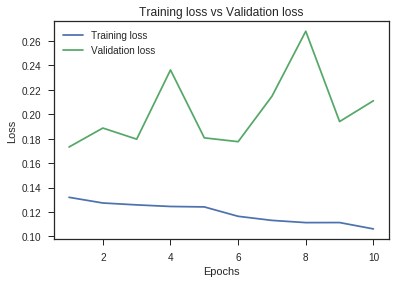

In [123]:
# training loss against validation loss
plt.clf()
plt.plot(np.arange(1,epochs+1), train_loss, label='Training loss')
plt.plot(np.arange(1,epochs+1), valid_loss, label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title('Training loss vs Validation loss')

plt.show()

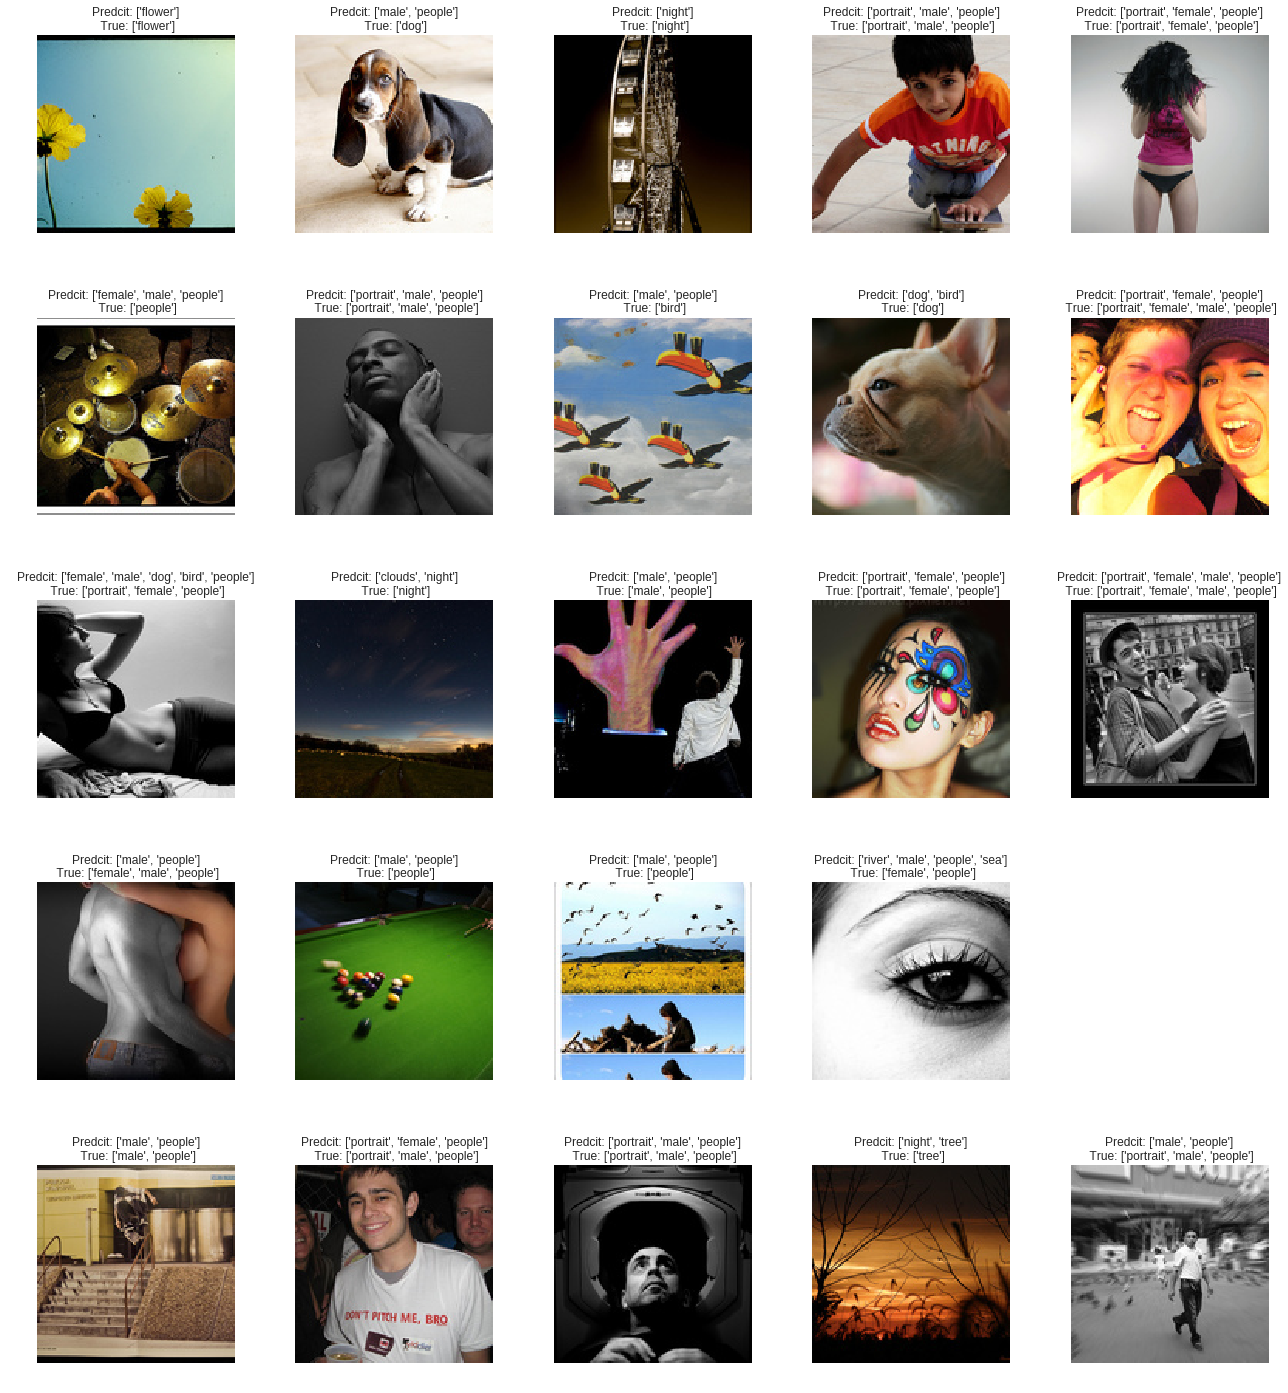

In [122]:
fig = plt.figure(figsize=(18,20))

for i in range(0,25):
    image = random.randint(1,1000)
    
    data = test_dataset.__getitem__(image)['image'].to(device)

    data = data.unsqueeze(0)

    output = model(data)
    pred = torch.tensor(output> torch.tensor(threshold_prevision).to(device), dtype=torch.float)
    y_pred = pred.cpu().detach().numpy()[0] # [1, 0, 1, 0 ...]

    
    ax = plt.subplot(5, 5, i + 1)
    plt.tight_layout()
    ax.set_title("Predcit: "+ str(list(pd.Series(np.asarray(classes))[y_pred.astype(int)==1]))+"\n True: "+str(test_dataset.__getitem__(image)['classes']))
    ax.axis('off')
    plot_image(test_dataset.__getitem__(image)['image'])
 
  

In [0]:
#save the model
torch.save(model.state_dict(), 'model.pkl')

In [0]:
#download it in local
from google.colab import files
files.download("model.pkl")

In [61]:
#load the model (it should be in the googgle colab main folder)
model.load_state_dict(torch.load("model.pkl"))
model.eval()

Inception_Net(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (incept1): Inception(
    (b1): Sequential(
      (0): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)
    )
    (b2): Sequential(
      (0): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1))
      (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)
      (3): Conv2d(96, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace)
    )
    (b3): Sequential(
      (0): Conv2d(192, 16, kernel_size=(1, 1), stride=(1, 1))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)


In [0]:
#once I load the model i can do prevsion or train in for more ephocs